In [178]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

In [185]:
n_clusters = 5
data, cluster_labels = make_blobs(n_samples=500, n_features=3, centers=n_clusters, random_state=42)
#data, cluster_labels = make_circles(n_samples=500, factor=0.1,random_state=42)

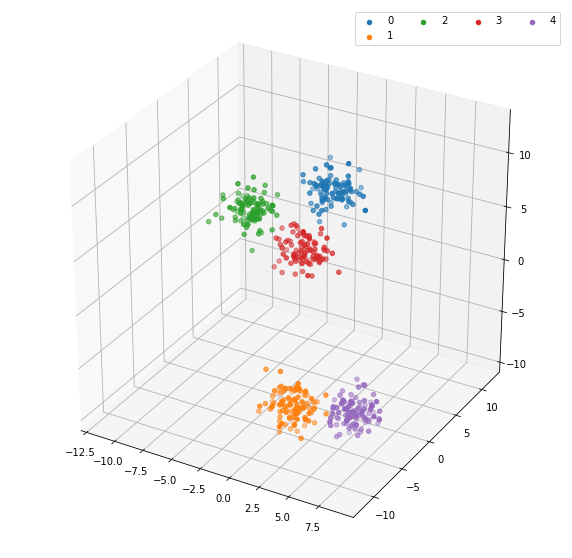

In [190]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for c in range(cluster_labels.max()+1):
    ax.scatter(data[cluster_labels==c].T[0],data[cluster_labels==c].T[1],data[cluster_labels==c].T[2], label=c)
plt.legend(ncol=4, loc='upper right')
plt.show()

In [191]:
metrics = ['euclidean', 'correlation']

In [192]:
X.shape

(500, 2)

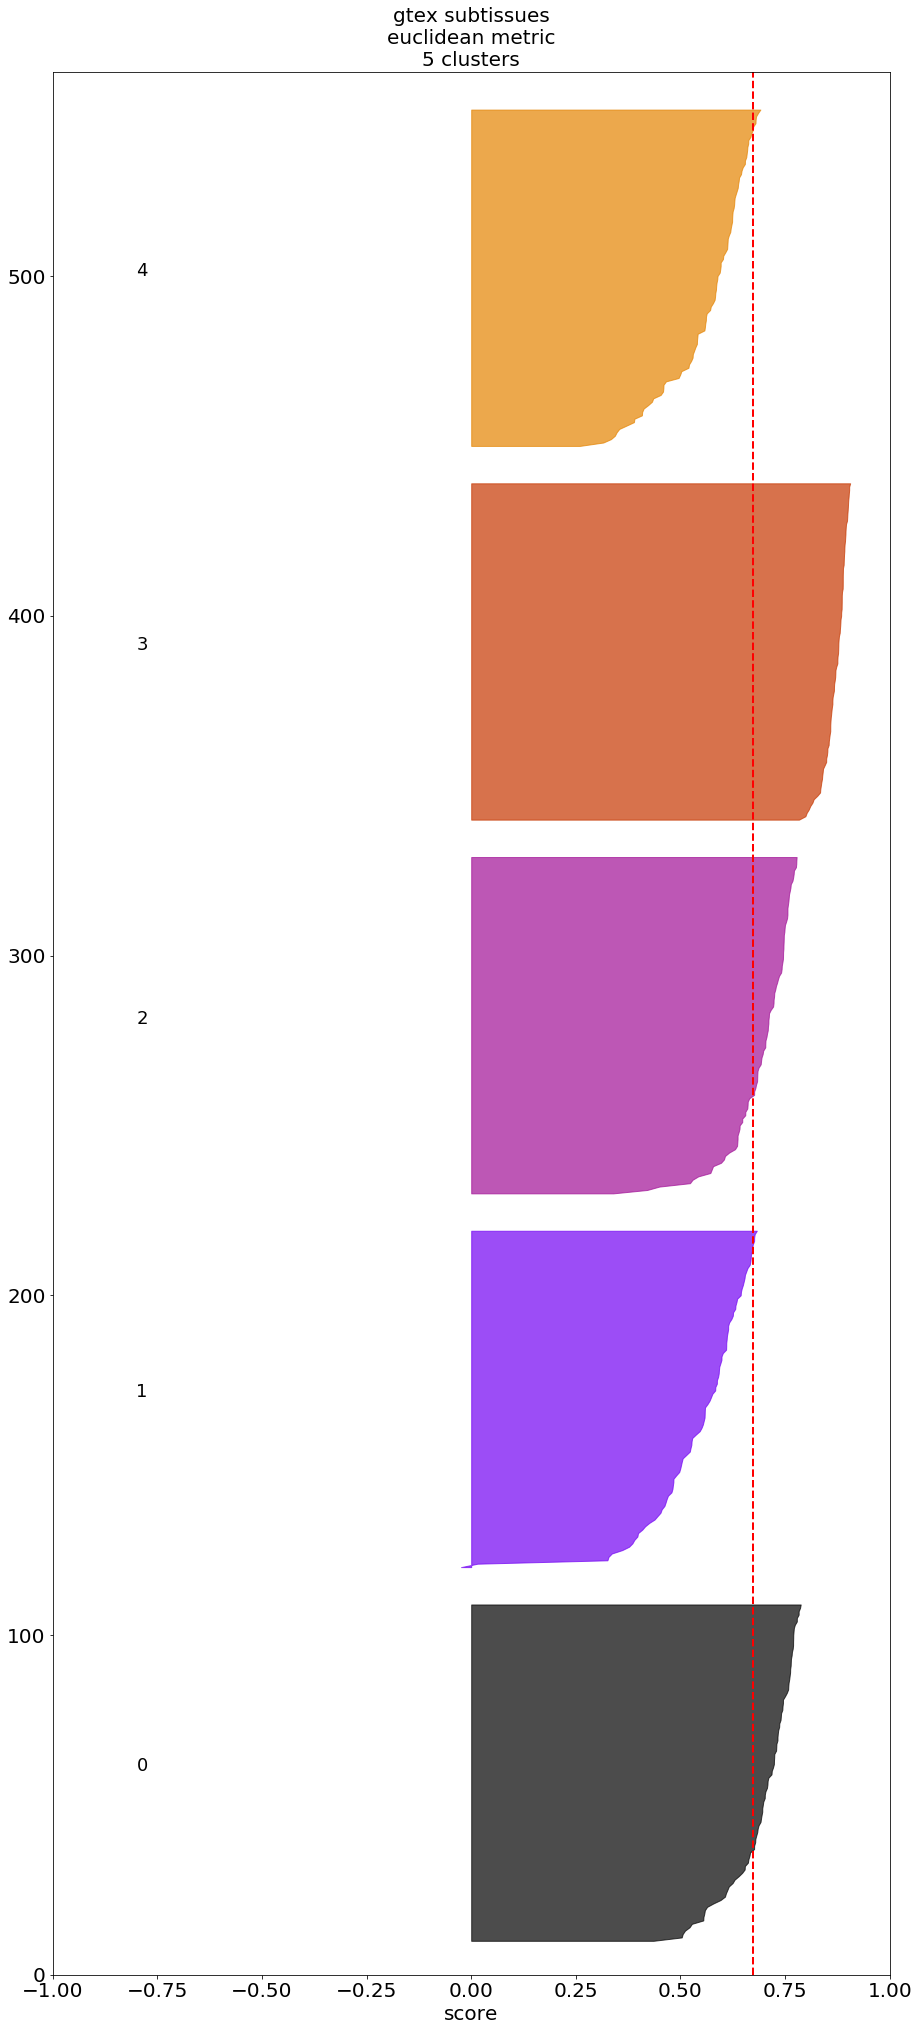

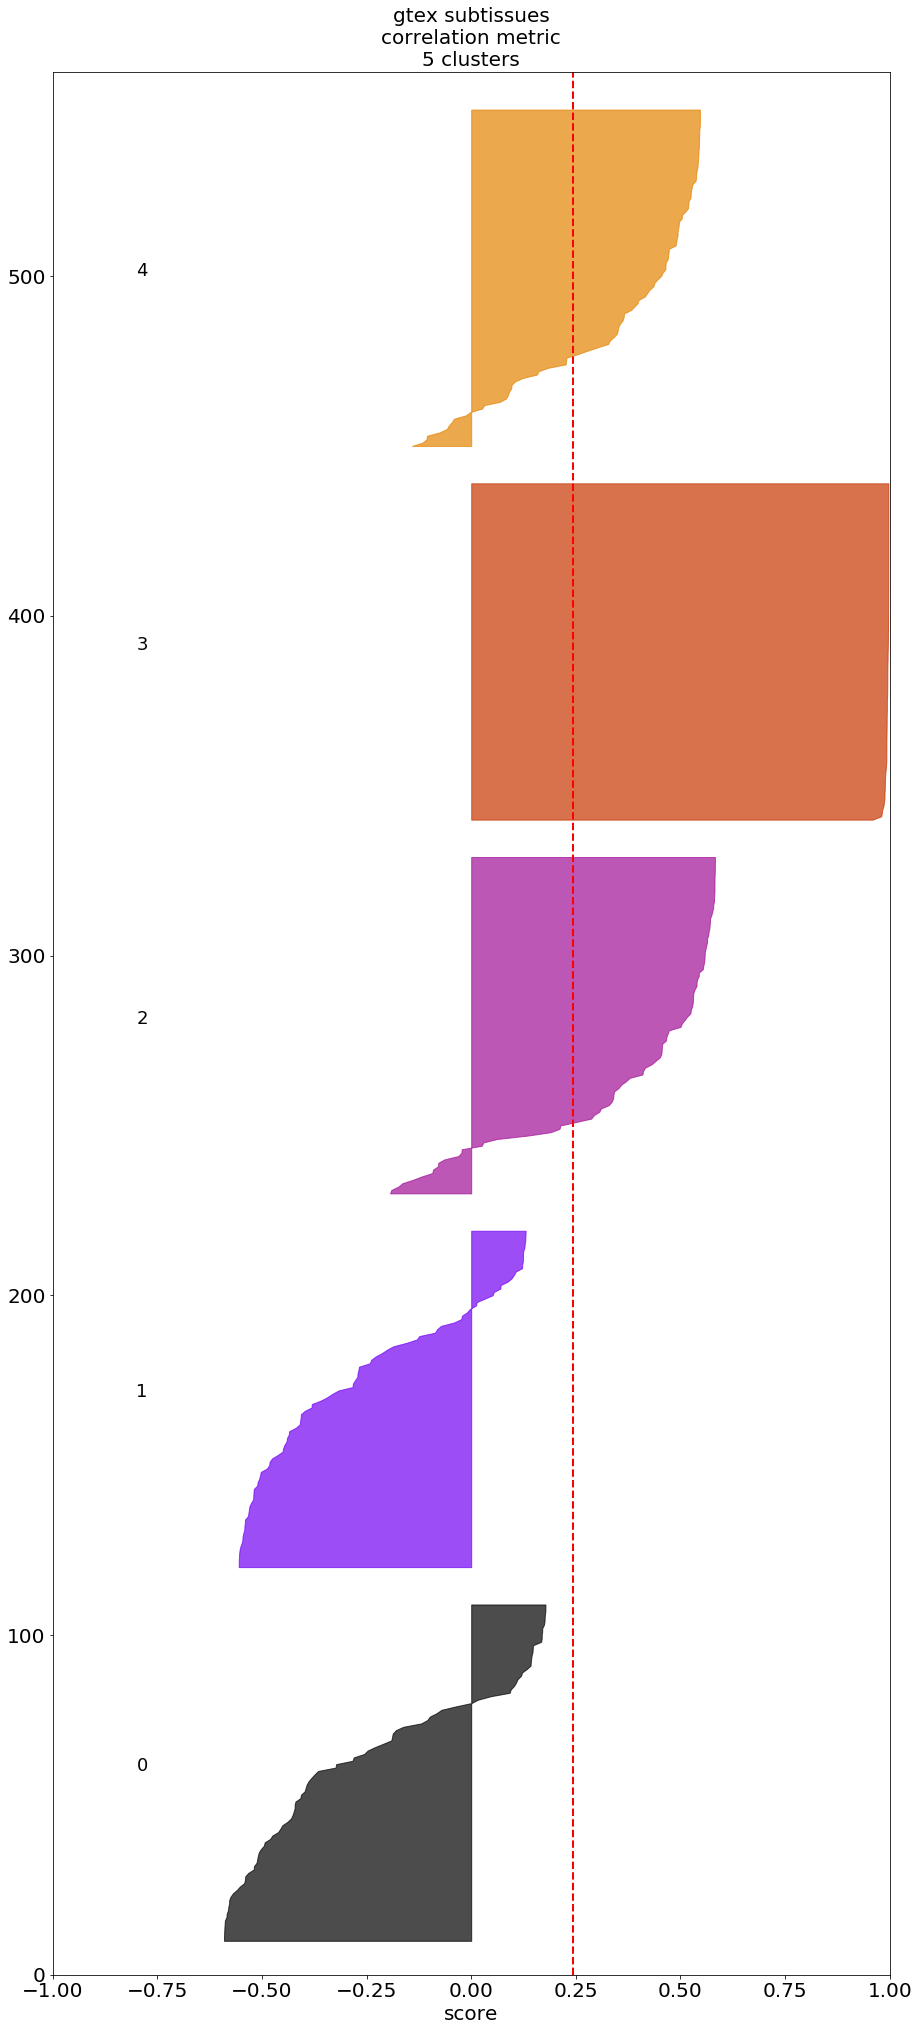

In [193]:
for k in metrics:
    y_lower = 10
    sample_silhouette_values = silhouette_samples(data, cluster_labels, metric=k)
    silhouette_avg=silhouette_score(data, cluster_labels, metric=k)
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(15, 35)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, data.shape[0] + (n_clusters + 1) * 10])

    for i in range(n_clusters):
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.gnuplot(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.8, (y_lower+y_upper)/2, "%d"%i, fontsize=18)
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
        
    ax.set_title("gtex subtissues\n%s metric\n%d clusters"%(k,n_clusters), fontsize=20)
    ax.set_xlabel("score", fontsize=20)
    # Label the silhouette plots with their cluster numbers at the middle
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", lw=2)
    plt.tick_params(labelsize=20)
    plt.show()
    fig.savefig("silhouette_blobs_%s.pdf"%(k))
    del sample_silhouette_values
    del silhouette_avg